### • Business Understanding

•  **Introduction:** The project involves working with the statistical data of the college students playing basketball. In this learning task, the goal is to predict whether a college basketball player will be drafted to join the NBA league based on their statistics.

The annual NBA draft is a highly anticipated event where NBA teams select players from American colleges and international professional leagues to join their rosters. Being drafted to the NBA is a significant achievement for any basketball player, marking a transition to the professional league. This event captures the attention of sports commentators, fans, and enthusiasts who eagerly track the careers of college players and speculate about their chances of being selected by NBA teams.


• **Dataset:** The dataset provided contains a wide range of features that illuminate players' performance during their college basketball season.
The dataset comprises 64 players' performance attributes, including Games Played (GP), Minutes Played (Min_per), Offensive Rating (ORtg), Defensive Rating (DRtg), Field Goals Made (twoPM), Free Throws Made (FTM), and many others offer insights into various facets of a player's playing style and contribution to their team.

        Basketball Players Metadata: metadata.csv
        Basketball Players Training dataset: train.csv
        Basketball Players Testing dataset: test.csv


• **Business Problem:** Build a Binary Classification predictive model capable of accuratly determining the likelihood of a college basketball player being drafted into the NBA based on their performance statistics from their records. The model's accurate predictions can provide valuable insights for both players and teams, aiding decision-making during the NBA draft process. Additionally, this model will offer valuable insights to sports commentators, fans, and scouts, aiding them in predicting the potential NBA draft prospects of individual players.

The primary evaluation metric for this task is the AUROC: Area Under the ROC (Receiver Operating Characteristic) Curve.

The subsequent activities are performed for this Binary Classification. 

• Business Understanding

• Data Understanding

        1] Loading Data
        2] Exploring Data

• Data Preparation

        3] Handling Missing Values
                - Treating missing values in numerical and categorical features 
                - Verifying and Removing Identifiers
        4] Predictors Selection
                - Analysing Correlation between predictors and target variable
                - Checking the outliers and distribution of values of the selected features
                - Selecting predictors
        5] Splitting Data into Different Sets
                - Accessing if imbalance and employing SMOTE for addressing
                - Selecting Target variable and Predictors
                - Splitting the sampled dataset into training - 80% and validation - 20%
        6] Features Scaling

• Modeling

        7] Assessing Baseline Performance
        8] Training Binary Classification Model
                - Random Forest

• Model Evaluation

        9] Analysing Model Performance

• Summary Insights and Recommendations

## Building a Classification Model

Note: This notebook comparises tasks associated with developing and assessing a classification model.

In [1]:
# Importing Python and the necessary libraries
import pandas as pd
import numpy as np

# Importing necessary Data Visualization libraries
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

# Importing SKLearn and other libraries necessary for the EDA and Modelling
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Importing dump library from joblib
from joblib import dump

# Importing formatting and other required libraries
import os
import sys
import warnings
from scipy.stats import randint

# Including the project root directory
sys.path.append('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')
from src.data.sets import load_datasets
from src.models.null import NullAccuracy
from src.models.performance import display_performance_score, evaluate_classifier_dataset, train_evaluate_classifier, display_confision_matrix

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings('ignore')

• Loading the processed datasets for building a machine learning model.

In [4]:
# Invoking the function to load the saved datasets from the data/processed directory
X_train, y_train, X_validate, y_validate, X_test, y_test = load_datasets(path='../data/processed/')

• Verify dimensions of the datasets following the loading process.

In [5]:
# Confirming the dimensions of the datasets post loading process
print('Predictors:')
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

print('\nTarget Variable:')
print(y_train.shape)
print(y_validate.shape)

Predictors:
(88888, 31)
(22222, 31)
(4970, 31)

Target Variable:
(88888,)
(22222,)


### • Modeling

#### 7] Assessing Baseline Performance

#### Rationale:

* The baseline performance serves as the most basic model that consistently predicts a fixed baseline value. This aids in assessing the effectiveness of the trained classification models, ensuring that our progress is in the correct direction.

Baseline AUROC score: 0.5


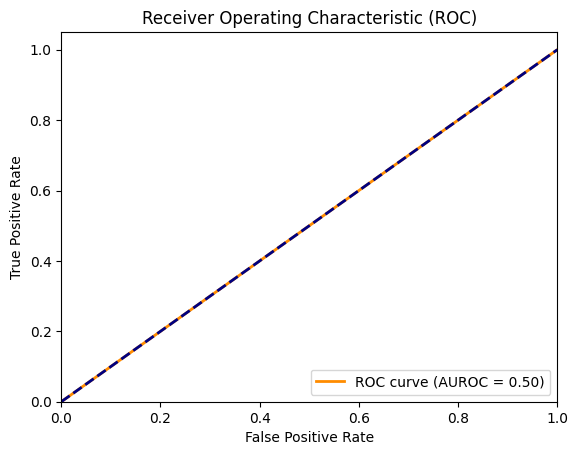

In [6]:
# Creating the object for the NullAccuracy class 
baseline = NullAccuracy()

# Invoking a method to evaluate the baseline performance score
y_base = baseline.fit_predict(y_train)

# Invoking the function to display the baseline performance score
display_performance_score(y_variable_actuals=y_train, y_variable_predicts=y_base, dataset_name='Baseline')


#### 8] Training Binary Classification Models

#### Rationale:

*  The target variable is binary, containing 0 signifying players who are not selected, and 1 representing drafted players. With our goal to predict outcomes within these two classes, a Binary Classification model is appropriate, aligning with the objective of categorizing players into these distinct groups.

* In this experiment, utilizing the Random Forest Classifier algorithm, which is well-suited for binary classification, to accurately determine whether the player will be selected for the NBA league.

* Employing AUROC (Area Under Receiver Operating Characteristic) is performance metirc that can use to evaluate binary classification models. It shows the trade-off between true positive rate (TPR) and false positive rate (FPR) across different decision thresholds.

#### * Experiment 1

• Instantiating instance of the RandomForest Classifier.

In [7]:
# Generating a 'rf_classifier' instance using the RandomForestClassifier class with its default hyperparameters
rf_classifier = RandomForestClassifier(random_state=19)

• Fitting the RandomForest Classifier model with the training data.

In [8]:
# Training the RandomForest classifier model using the features of the training dataset
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=19)

• Saving the fitted model into the models directoy as a file named 'rf_classifier_default.joblib'

In [9]:
# Storing the fittted classification model in the models directory and naming the file as 'rf_classifier_default_tuned.joblib'
dump(rf_classifier, '../models/rf_classifier_default_tuned.joblib')

['../models/rf_classifier_default_tuned.joblib']

• Predicting the results for training and validation datasets using trained model. 

In [10]:
# Predicting from the trained model for the training and validation datasets storing the results in 'y_train_predicts' and 'y_validate_predicts' variables.
y_train_predicts = rf_classifier.predict(X_train)
y_validate_predicts = rf_classifier.predict(X_validate)

• Displaying the performance metrics for the training and validation datasets.

Training AUROC score: 1.0


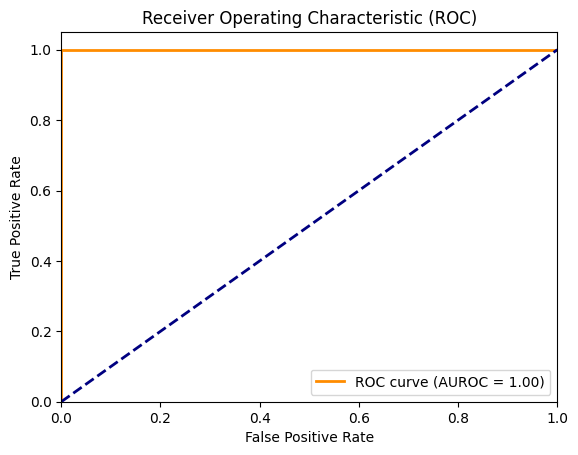

Validation AUROC score: 0.9912069902296776


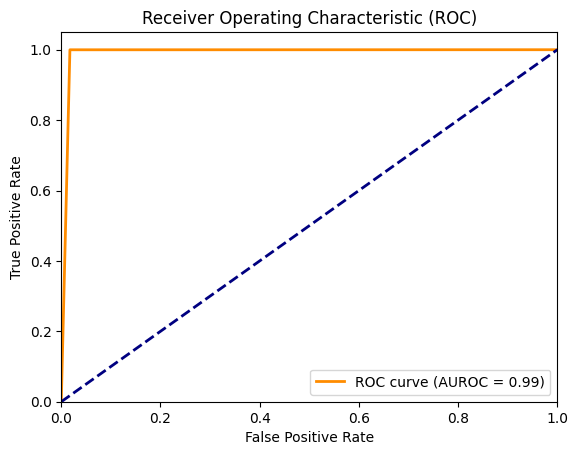

In [11]:
# Invoking the function to display the performance scores for traning and validation datasets
display_performance_score(y_variable_actuals=y_train, y_variable_predicts=y_train_predicts, dataset_name='Training')
display_performance_score(y_variable_actuals=y_validate, y_variable_predicts=y_validate_predicts, dataset_name='Validation')

• Displaying the confusion matrix for the training and validation datasets.

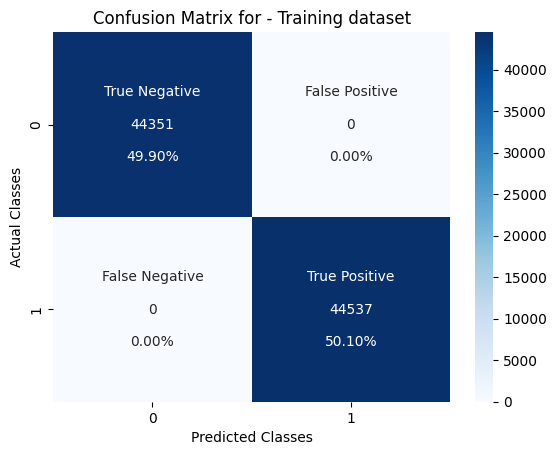

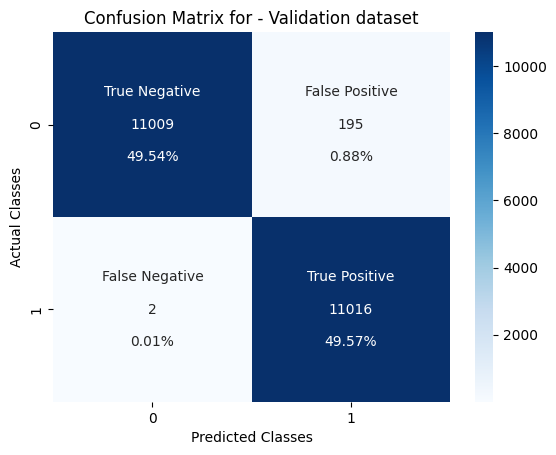

In [34]:
# Invoking the function to display the confusion matrix for traning and validation datasets
display_confision_matrix(y_variable_actuals=y_train, y_variable_predicts=y_train_predicts, dataset_name='Training')
display_confision_matrix(y_variable_actuals=y_validate, y_variable_predicts=y_validate_predicts, dataset_name='Validation')

#### Insight: 

*  The AUROC performance score achieved by the model on the training set is higher than the baseline performance score.

* The AUROC performance score on the validation set 0.9912 is slightly lower compared to the ideal 1.0 score achieved on the training set, indicating that the model is narrowly overfitting. 

* Additionally, from the ROC curve of training and validation datasets, visually representing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for different threshold values, suggest the similar light overfitting nature of the model.

* However, the False Negative error of 195 on the validation informs that the model is considerably overfitting and is not generaised enough on the new data.

#### * Experiment 2

#### Rationale: 

* Utilizing Hyperparameter Tuning to identify the best hyperparameter values for the Random Forest Classifier algorithm, addressing the slight overfitting observed in the model.

* Applying the Random Search method for hyperparameter tuning, which involves incorporating randomness by selecting values from the search space. This approach can generate various combinations of hyperparameter values that lead to achieving the minimal error. Grid Search's evenly spaced points may miss optimal hyperparameters.


• Hyperparameter Tuning.

Note: The process of hyperparameter tuning below requires more than an hour to finish.

In [ ]:
# Performing cross-validated hyperparameter optimization for the RandomForest Classifier using Random Search

# i) Instantiating 'rf_classifier1' RandomForest model instance
rf_classifier1 = RandomForestClassifier()

# ii) Defining 'hyperparameters_dict' dictionary specifying the range of values to search over using Random Search
hyperparameters_dict = {'n_estimators': randint(1, 500),
                    'class_weight': ['balanced'],
                    'criterion': ['gini', 'entropy'],
                    'max_depth': randint(1, 1000),
                    'min_samples_leaf': randint(5, 50),
                    'max_features': ['sqrt', 'log2']}

# iii) Instantiating 'stf_cv' object of StratifiedKFold to perform stratified cross-validation
stf_cv = StratifiedKFold(n_splits=5)

# iv) Instantiating 'random_search_rf' object of RandomizedSearchCV and passing required parameters
rf_random_search = RandomizedSearchCV(rf_classifier1, hyperparameters_dict, random_state=9, cv=stf_cv, verbose=1)

# v) Combining the training and validation sets for cross-validation
X_merged = np.concatenate((X_train, X_validate), axis=0)
y_merged = np.concatenate((y_train, y_validate), axis=0)

# vi) Training the RandomForest classifier with different hyperparameters
rf_random_search.fit(X_merged, y_merged)

# vii) Retrieving best the set of hyperparameters using 'best_params_' attribute of the RandomizedSearchCV object
print('Following are the Hyperparameters tuned values of the Random Forest classifier:\n', rf_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Following are the Hyperparameters tuned values of the Random Forest classifier:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 487, 'max_features': 'log2', 'min_samples_leaf': 14, 'n_estimators': 209}


• Instantiating instance of the RandomForest Classifier.

In [12]:
# Generating a 'rf_classifier2' instance using the RandomForestClassifier class with its tuned hyperparameters values
rf_classifier2 = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features = 'log2', 
                                        n_estimators=209, max_depth=487, min_samples_leaf=14, random_state=9)

• Fitting the RandomForest Classifier model with the training data, predicting and display its performance scores.

Training AUROC score: 0.9879937888414816


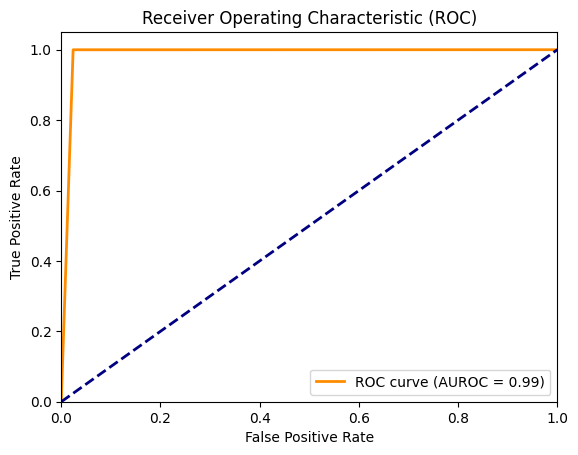

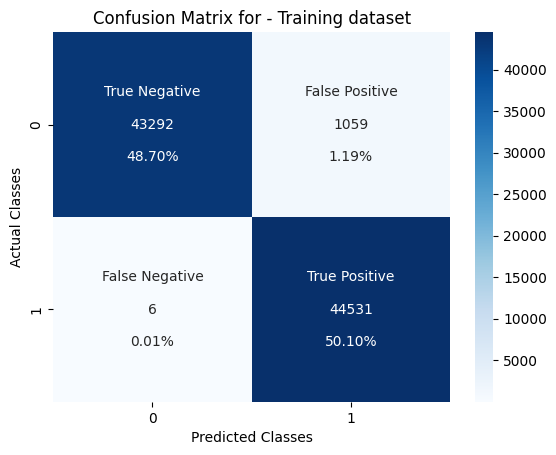

In [13]:
# Invoking the funtion to fit the classifier model using the traning features, predict and display the performance scores of the training dataset
rf_classifier2 = train_evaluate_classifier(rf_classifier2, X_train, y_train)

• Predicting the results for the validation dataset using trained model and displaying its performance metrics. 

Validation AUROC score: 0.9844199317089058


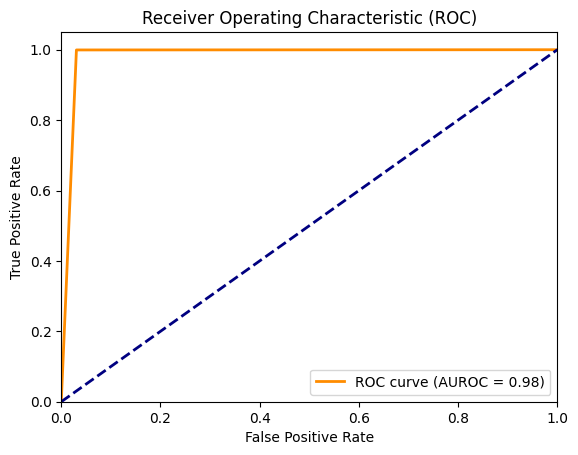

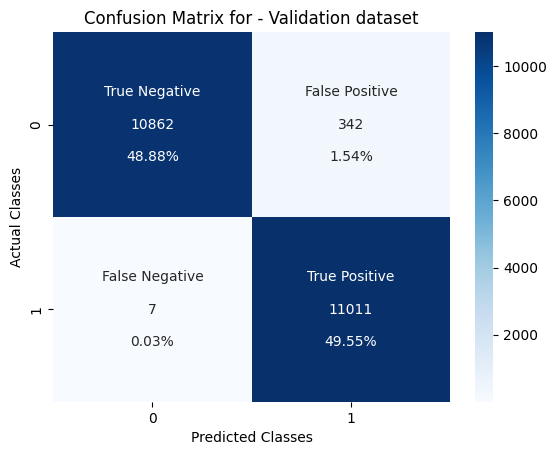

In [14]:
# Invoking the function to predict classes for the validation dataset and display the performance scores
evaluate_classifier_dataset(rf_classifier2, X_validate, y_validate, dataset_name='Validation')

#### Insights: 

* The slight variation in AUROC scores between training (0.9879) and validation (0.9844) datasets suggests that the model with optimized hyperparameters maintains consistent performance across datasets with minor differences.

* However, there is a minor decrease in the performance metric compared the model from 1st experiment, signalling instances where players were misclassified as drafted, affecting the NAB team's overall performance and the model is not capturing important patterns and not generalised enough to identify potential players that will be drafted in the NBA league. 

* Additionally, the occurrence of 1059 False Positive in the training dataset and 342 in the validation dataset suggests that players who should not be selected are mistakenly included in the NBA team which might impact the team’s efficiency and shooting goal percentage. 

### • Model Evaluation

#### 9] Analysing Model Performance

• Assessing the performance of the model using the testing dataset.

In [15]:
# Evaluating the model's performance using the testing dataset
y_test_predicts = rf_classifier2.predict_proba(X_test)

In [16]:
# Loading the testing dataset required for the kaggle submission
# Note: Change this path to the relevant directory
absolute_path = os.path.abspath('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')
df_testing = pd.read_csv(absolute_path + '/data/raw/test.csv')

In [17]:
# Preparing results for the kaggle submission
df_kaggle_submission = pd.DataFrame({'player_id': df_testing['player_id'], 'drafted': y_test_predicts[:, 1]})
df_kaggle_submission.to_csv(absolute_path + '/data/processed/Patil_Monali-14370946-week2_RF_Results_Tuned.csv', index=False)

#### Feature Importance

#### Rationale: 

* Deriving feature importance measure that can offer valuable insights into the players records, to help comprehend which features have the most significant impact on the model's predictions to identify prospective players for selection in the NBA league.

* Furthermore, this measures is readily available as the Random Forest Classifier algorithm computes the change in purity for each feature during the splitting process. By combining these values for each feature, the algorithm determines the influence of each feature on predictions.

In [18]:
# Loading the original dataset to extract feature importance measures and collecting selected features utilised to build the classification model 
df_data = pd.read_csv(absolute_path + '/data/raw/train.csv')
df_selected_features = ['GP', 'Min_per', 'usg', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPM', 'TPA', 
                        'porpag', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 
                        'dunksmade', 'dunksmiss_dunksmade', 'dporpag', 'stops', 'bpm', 'obpm', 
                        'gbpm', 'mp', 'ogbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 
                        'pts', 'adjoe']

In [19]:
# Extracting the contribution of each feature to predictions

# i) Generating a 'feature_names' dataframe for extracting the names of features
feature_names = pd.DataFrame(df_data[df_selected_features])

# ii) Creating 'df_rf_feature_imporance' dataframe with features names and their corresponding importance measures information
df_rf_feature_imporance = pd.DataFrame({'Feature_Name': feature_names.columns,
                                        'Feature_Importance_Rate': rf_classifier2.feature_importances_})

# iii) Displaying a horizontal bar chart to illustrate the rates of feature importance for each feature within the dataset
print('\nFeature Importance Measures')
alt.Chart(df_rf_feature_imporance).mark_bar().encode(x='Feature_Importance_Rate',
                                                    y=alt.Y('Feature_Name', sort='-x'),
                                                    tooltip=['Feature_Name','Feature_Importance_Rate']) 


Feature Importance Measures


alt.Chart(...)

### • Summary Insights and Recommendations

* The bar chart above illustrates that the features making the least contribution include 'TPM', 'ast', 'TPA', 'stl', 'GP', 'oreb', 'midmade', 'rimmade', 'rimmade_rimmiss', 'midmade_midmiss', 'mp', 'usg', 'Min_per', 'blk', 'treb'.

* And, the rest of the features have a significant impact on predicting either class 1, indicating players selected for the NBA league, or class 0, representing those not chosen. Their feature importance rates range from 0.02% to 0.15%.

* Furthermore, utilising Hyper tuned parameters in the 2nd experiment, there is a slight variation in AUROC scores between training (0.9879), validation (0.9844) and testing (0.9680) datasets suggesting that the model with optimized hyperparameters is not maintaining consistent performance across datasets and is relatively overfitting on the unseen data. 

* Additionally, evaluating the performance metric, confusion matirx and the ROC curve plot indicates that the Logistic Regression Classifier model from the first week's experiment outperforms and is more suitable compared to the Random Forest Classifier model used in the second week.

* Before considering the deployment of the model in the operational environment, it's advisable to evaluate the performance of alternative algorithms using the Feature Importance information and then select the most effective model.

* Thus, in the next experiment, utilizing the Feature Importance information with different Classifier model to verify if the model's generalized performance could be enhanced.
